In [26]:
import pandas as pd

# ÌååÏùº Í≤ΩÎ°ú
file1 = 'df_merged_solar.csv'
file2 = 'df_merged_solar2.csv'

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

# Îç∞Ïù¥ÌÑ∞ Í≤∞Ìï©
df_merged = pd.concat([df1, df2], ignore_index=True)

# Í≤∞Í≥º Ï†ÄÏû• (ÏÑ†ÌÉù)
df_merged.to_csv('df_merged_solar+solar2.csv', index=False)
df_merged = df_merged[df_merged['Î∞úÏ†ÑÍµ¨Î∂Ñ'] != '(Íµ∞ÏÇ∞)ÏòÅÏïîF1ÌÉúÏñëÍ¥ë']

# Í≤∞Ìï©Îêú Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
print(df_merged.shape)
print(df_merged.head())
# "Î∞úÏ†ÑÍµ¨Î∂Ñ"Ïù¥ "(Íµ∞ÏÇ∞)ÏòÅÏïîF1ÌÉúÏñëÍ¥ë"Ïù∏ Ìñâ Ï†úÍ±∞




(196890, 15)
             ÏùºÏûê        Î∞úÏ†ÑÍµ¨Î∂Ñ  ÏÑ§ÎπÑÏö©Îüâ(MW)  ÏãúÍ∞Ñ  Î∞úÏ†ÑÎüâ(kWh)  Ïó∞Ïãù(ÎÖÑ)  ÏßÄÏ†êÎ™Ö  Í∏∞Ïò®(¬∞C)  \
365  2023-01-01  (Íµ∞ÏÇ∞)ÏÇºÎûëÏßÑÌÉúÏñëÍ¥ë       2.0   1       0.0   14.8  ÏñëÏÇ∞Ïãú     1.9   
366  2023-01-02  (Íµ∞ÏÇ∞)ÏÇºÎûëÏßÑÌÉúÏñëÍ¥ë       2.0   1       0.0   14.8  ÏñëÏÇ∞Ïãú     3.2   
367  2023-01-03  (Íµ∞ÏÇ∞)ÏÇºÎûëÏßÑÌÉúÏñëÍ¥ë       2.0   1       0.0   14.8  ÏñëÏÇ∞Ïãú     1.8   
368  2023-01-04  (Íµ∞ÏÇ∞)ÏÇºÎûëÏßÑÌÉúÏñëÍ¥ë       2.0   1       0.0   14.8  ÏñëÏÇ∞Ïãú     0.7   
369  2023-01-05  (Íµ∞ÏÇ∞)ÏÇºÎûëÏßÑÌÉúÏñëÍ¥ë       2.0   1       0.0   14.8  ÏñëÏÇ∞Ïãú    -1.1   

     Í∞ïÏàòÎüâ(mm)  ÌíçÏÜç(m/s)  ÌíçÌñ•(16Î∞©ÏúÑ)  ÏäµÎèÑ(%)  ÏùºÏÇ¨(MJ/m2)  Ï†ÅÏÑ§(cm)  ÌïòÎäòÏÉÅÌÉú  
365      0.0      2.4     180.0   54.0        0.0     0.0   1.0  
366      0.0      1.7     320.0   32.0        0.0     0.0   4.0  
367      0.0      3.7     270.0   25.0        0.0     0.0   1.0  
368      0.0      2.8     290.0   37.0        0.0     0.0   1.0  
369      0.

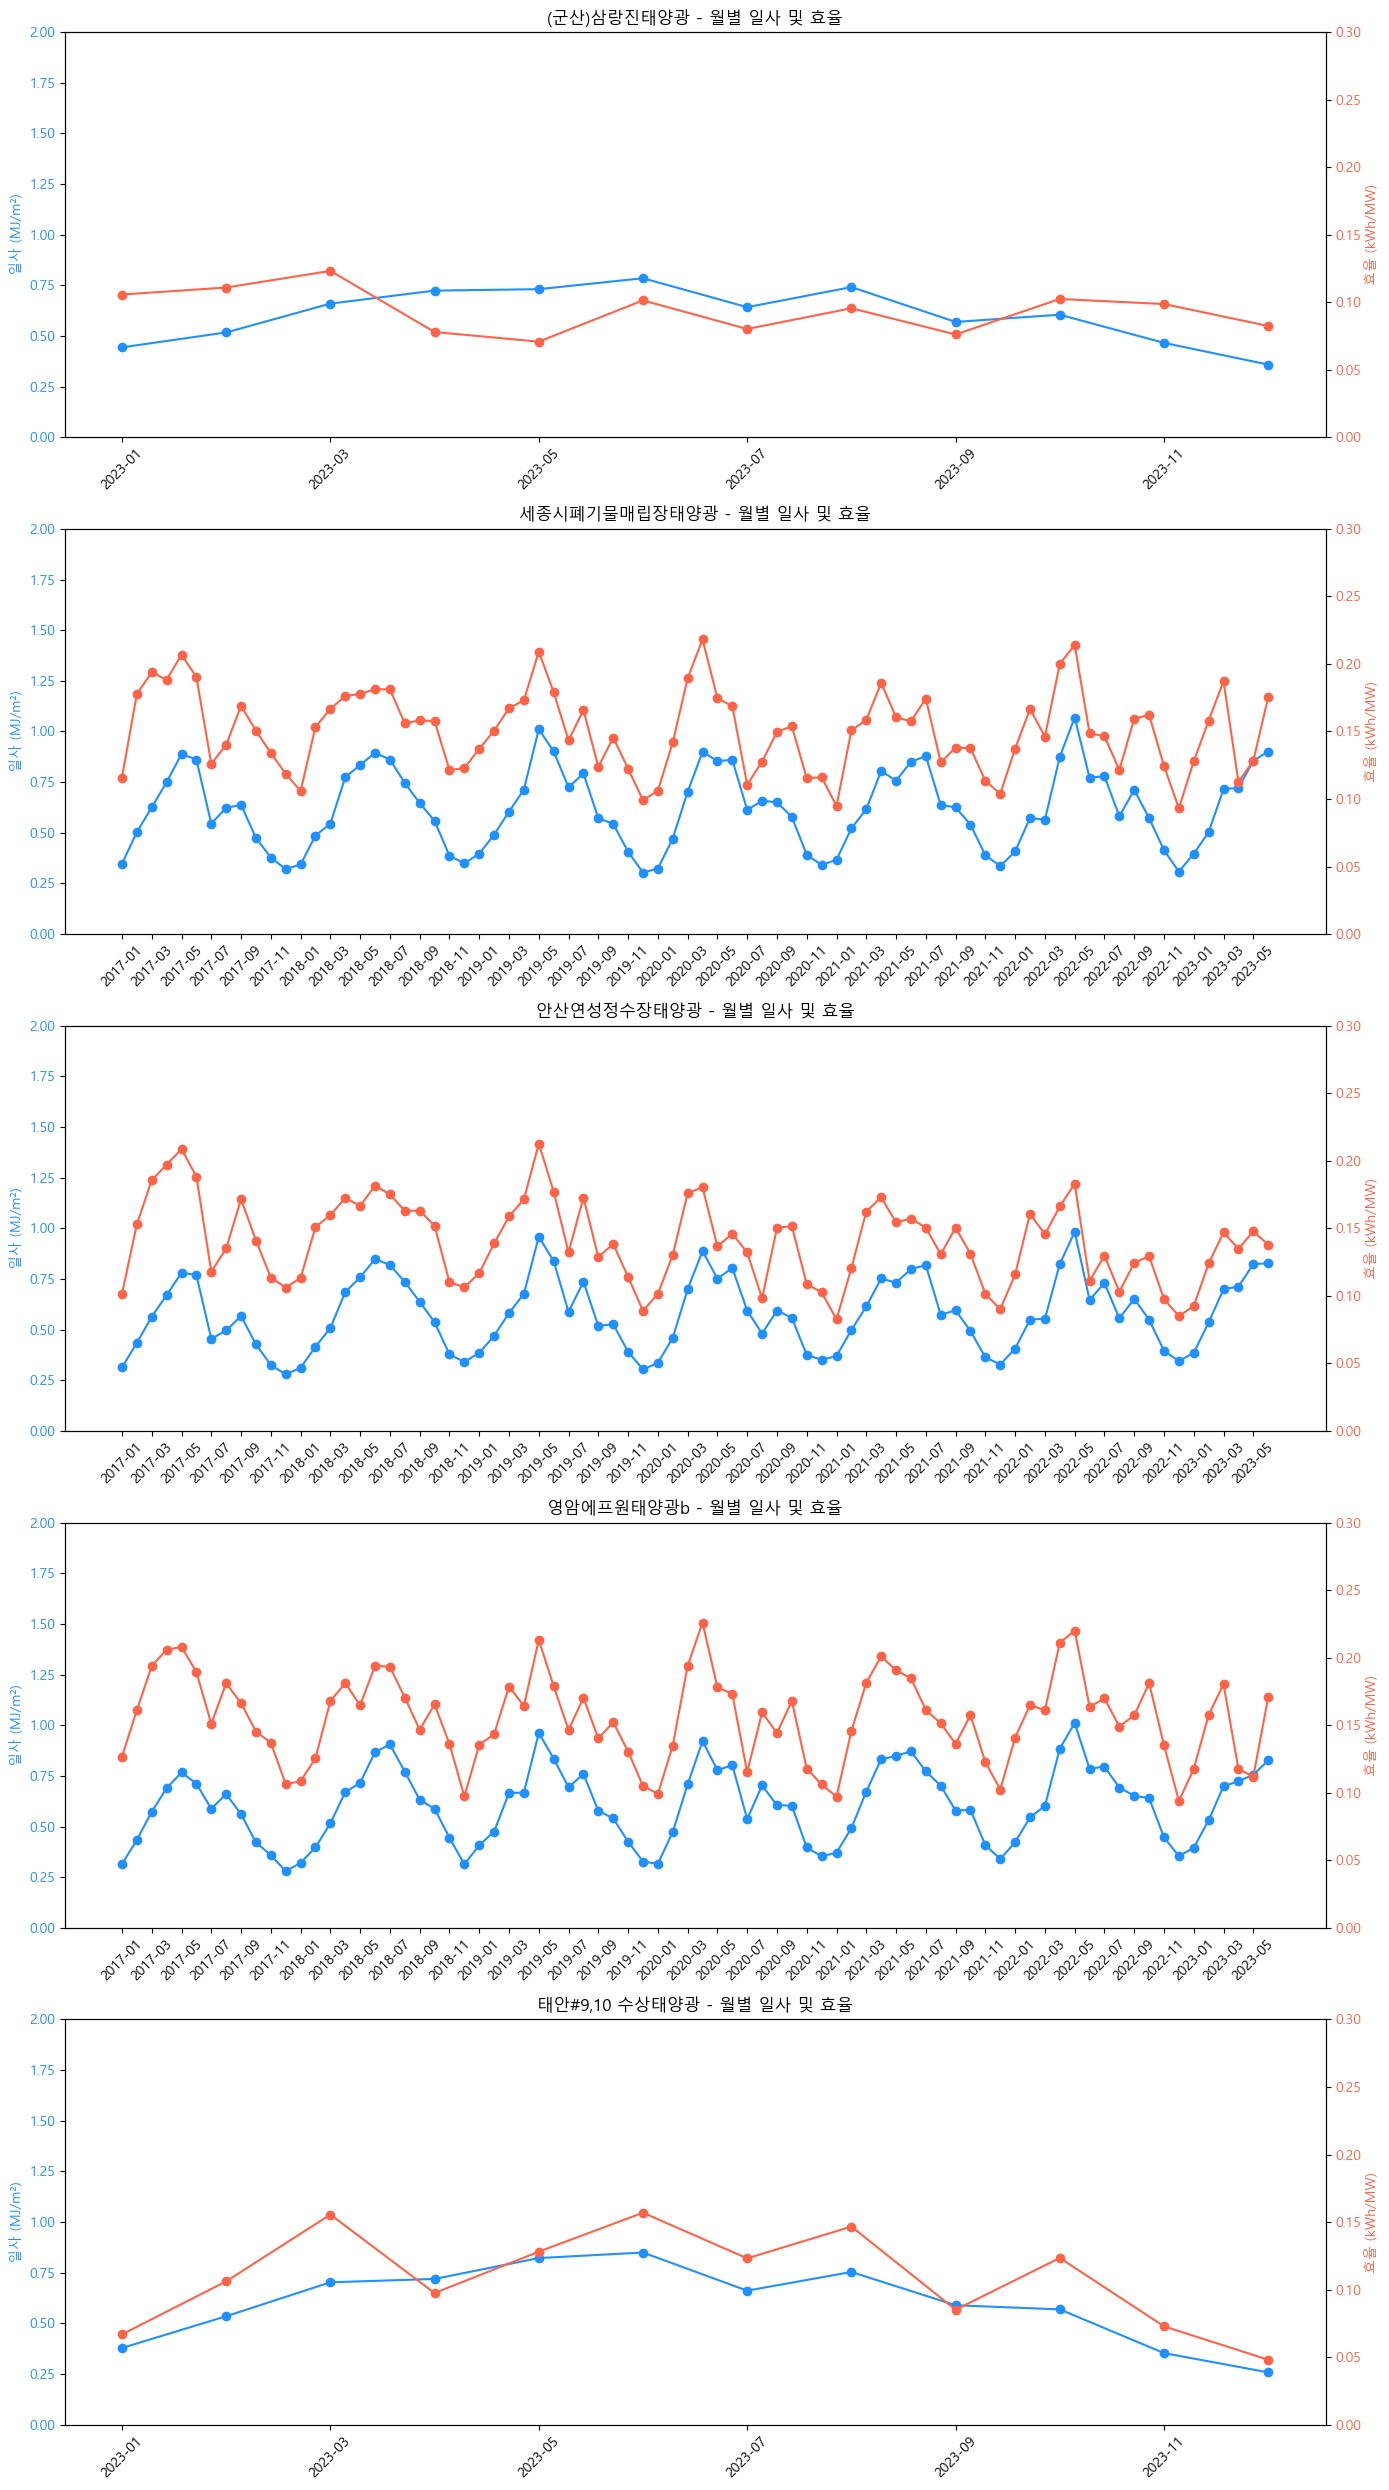

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# ‚úÖ ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# ‚úÖ ÏÇ¨Ïö©Ïûê ÏÑ§Ï†ï yÏ∂ï Î≤îÏúÑ
irr_min, irr_max = 0, 2   # ÏùºÏÇ¨ (MJ/m¬≤)
eff_min, eff_max = 0, 0.3      # Ìö®Ïú® (kWh/MW)

# ‚úÖ Ïó∞Ïõî Î∞è Ìö®Ïú® Í≥ÑÏÇ∞
df_merged['ÏùºÏûê'] = pd.to_datetime(df_merged['ÏùºÏûê'], errors='coerce')
df_merged['Ïó∞Ïõî'] = df_merged['ÏùºÏûê'].dt.to_period('M').astype(str)
df_merged['Ìö®Ïú®'] = df_merged['Î∞úÏ†ÑÎüâ(kWh)'] / (df_merged['ÏÑ§ÎπÑÏö©Îüâ(MW)'] * 1000)

# ‚úÖ Í≤∞Ï∏° Ï†úÍ±∞ Î∞è ÏõîÎ≥Ñ ÌèâÍ∑†
df_cleaned = df_merged.dropna(subset=['Ïó∞Ïõî', 'Î∞úÏ†ÑÍµ¨Î∂Ñ', 'ÏùºÏÇ¨(MJ/m2)', 'Ìö®Ïú®'])
grouped = df_cleaned.groupby(['Î∞úÏ†ÑÍµ¨Î∂Ñ', 'Ïó∞Ïõî']).agg({
    'ÏùºÏÇ¨(MJ/m2)': 'mean',
    'Ìö®Ïú®': 'mean'
}).reset_index()

# ‚úÖ Î∞úÏ†ÑÏÜå Î¶¨Ïä§Ìä∏
plants = grouped['Î∞úÏ†ÑÍµ¨Î∂Ñ'].unique()
num_plants = len(plants)

# ‚úÖ Ï†ÑÏ≤¥ Figure ÏÉùÏÑ± (ÏÑ∏Î°úÎ°ú ÎÇòÏó¥)
fig, axes = plt.subplots(num_plants, 1, figsize=(14, 5 * num_plants))

if num_plants == 1:
    axes = [axes]  # subplotÏù¥ 1Í∞úÏùº Í≤ΩÏö∞ÎèÑ Î¶¨Ïä§Ìä∏Î°ú Ï≤òÎ¶¨

for i, plant in enumerate(plants):
    ax1 = axes[i]
    sub = grouped[grouped['Î∞úÏ†ÑÍµ¨Î∂Ñ'] == plant]
    x = sub['Ïó∞Ïõî']

    # ÏùºÏÇ¨ (ÏôºÏ™Ω yÏ∂ï)
    ax1.plot(x, sub['ÏùºÏÇ¨(MJ/m2)'], color='dodgerblue', marker='o', label='ÏùºÏÇ¨ (MJ/m¬≤)')
    ax1.set_ylabel('ÏùºÏÇ¨ (MJ/m¬≤)', color='dodgerblue')
    ax1.tick_params(axis='y', labelcolor='dodgerblue')
    ax1.set_ylim(irr_min, irr_max)

    # Ìö®Ïú® (Ïò§Î•∏Ï™Ω yÏ∂ï)
    ax2 = ax1.twinx()
    ax2.plot(x, sub['Ìö®Ïú®'], color='tomato', marker='o', label='Ìö®Ïú®')
    ax2.set_ylabel('Ìö®Ïú® (kWh/MW)', color='tomato')
    ax2.tick_params(axis='y', labelcolor='tomato')
    ax2.set_ylim(eff_min, eff_max)

    # xÏ∂ï ÏÑ§Ï†ï
    ax1.set_xticks(x[::2])
    ax1.set_xticklabels(x[::2], rotation=45)

    ax1.set_title(f'{plant} - ÏõîÎ≥Ñ ÏùºÏÇ¨ Î∞è Ìö®Ïú®')

# ‚úÖ Ï†ÑÏ≤¥ Î†àÏù¥ÏïÑÏõÉ Ï°∞Ï†ï Î∞è Ï†ÄÏû•
plt.tight_layout()
plt.savefig('solar3_ÏùºÏÇ¨Îüâ-Î∞úÏ†ÑÌö®Ïú®.png', dpi=300)
plt.show()

df_merged = df_merged.drop(columns=['Ìö®Ïú®', 'Ïó∞Ïõî'], errors='ignore')




In [41]:
print(df_merged['Î∞úÏ†ÑÍµ¨Î∂Ñ'].unique())


['(Íµ∞ÏÇ∞)ÏÇºÎûëÏßÑÌÉúÏñëÍ¥ë' 'ÌÉúÏïà#9,10 ÏàòÏÉÅÌÉúÏñëÍ¥ë' 'ÏÑ∏Ï¢ÖÏãúÌèêÍ∏∞Î¨ºÎß§Î¶ΩÏû•ÌÉúÏñëÍ¥ë' 'ÏïàÏÇ∞Ïó∞ÏÑ±Ï†ïÏàòÏû•ÌÉúÏñëÍ¥ë' 'ÏòÅÏïîÏóêÌîÑÏõêÌÉúÏñëÍ¥ëb']


In [42]:
import pandas as pd
import pvlib

# 1) ÏúÑÎèÑ¬∑Í≤ΩÎèÑ Ï†ïÎ≥¥ (ÏßÄÏ†ê Í∏∞Ï§Ä) - Î∞òÎìúÏãú Ïã§Ï†ú ÏúÑÏπò Í∏∞Î∞òÏúºÎ°ú ÏóÖÎç∞Ïù¥Ìä∏ ÌïÑÏöî
location_info = {
    '(Íµ∞ÏÇ∞)ÏÇºÎûëÏßÑÌÉúÏñëÍ¥ë': (35.3867, 128.8963),   # Í≤ΩÎÇ® Î∞ÄÏñëÏãú ÏÇºÎûëÏßÑÏùç Î∂ÄÍ∑º
    'ÌÉúÏïà#9,10 ÏàòÏÉÅÌÉúÏñëÍ¥ë': (36.7868, 126.2987), # Ï∂©ÎÇ® ÌÉúÏïàÍµ∞ ÏõêÎ∂ÅÎ©¥ Î∂ÄÍ∑º
    'ÏÑ∏Ï¢ÖÏãúÌèêÍ∏∞Î¨ºÎß§Î¶ΩÏû•ÌÉúÏñëÍ¥ë': (36.5287, 127.2875), # ÏÑ∏Ï¢ÖÏãú Ïó∞ÏÑúÎ©¥ ÏùºÎåÄ
    'ÏïàÏÇ∞Ïó∞ÏÑ±Ï†ïÏàòÏû•ÌÉúÏñëÍ¥ë': (37.3219, 126.8337), # Í≤ΩÍ∏∞ÎèÑ ÏïàÏÇ∞Ïãú Îã®ÏõêÍµ¨ Î∂ÄÍ∑º
    'ÏòÅÏïîÏóêÌîÑÏõêÌÉúÏñëÍ¥ëb': (34.7577, 126.3910),    # Ï†ÑÎÇ® ÏòÅÏïî F1 Í≤ΩÍ∏∞Ïû• Î∂ÄÍ∑º
}

# 2) ÏãúÍ∞Ñ ÌòïÎ≥ÄÌôò Î∞è 24Ïãú Ï≤òÎ¶¨
df_merged['ÏãúÍ∞Ñ'] = df_merged['ÏãúÍ∞Ñ'].astype(int)
df_merged['ÏãúÍ∞ÑÏ°∞Ï†ï'] = df_merged['ÏãúÍ∞Ñ'] % 24
df_merged['ÏùºÏûêÏ°∞Ï†ï'] = pd.to_datetime(df_merged['ÏùºÏûê']) + pd.to_timedelta((df_merged['ÏãúÍ∞Ñ'] // 24), unit='D')

# 3) 'ÏùºÏãú' Ïª¨Îüº ÏÉùÏÑ± + ÌÉÄÏûÑÏ°¥ ÏßÄÏ†ï (Asia/Seoul)
df_merged['ÏùºÏãú'] = pd.to_datetime(
    df_merged['ÏùºÏûêÏ°∞Ï†ï'].dt.strftime('%Y-%m-%d') + ' ' + df_merged['ÏãúÍ∞ÑÏ°∞Ï†ï'].astype(str) + ':00:00'
)
df_merged['ÏùºÏãú'] = df_merged['ÏùºÏãú'].dt.tz_localize('Asia/Seoul')

# 4) ÌÉúÏñë ÏúÑÏπò Í≥ÑÏÇ∞ Ìï®Ïàò
def compute_solar_pos(row):
    plant = row['Î∞úÏ†ÑÍµ¨Î∂Ñ']
    dt = row['ÏùºÏãú']
    if plant not in location_info:
        return pd.Series([None, None])
    lat, lon = location_info[plant]
    loc = pvlib.location.Location(lat, lon, tz='Asia/Seoul')
    pos = loc.get_solarposition(times=[dt])
    return pd.Series([pos['apparent_elevation'].iloc[0], pos['azimuth'].iloc[0]])

# 5) Í≥ÑÏÇ∞ Ï†ÅÏö©
df_merged[['ÌÉúÏñëÍ≥†ÎèÑ', 'Î∞©ÏúÑÍ∞Å']] = df_merged.apply(compute_solar_pos, axis=1)

# 6) Í≥†ÎèÑÍ∞Ä 0 Ïù¥ÌïòÏù∏ Í≤ΩÏö∞ Î∞©ÏúÑÍ∞Å Í≤∞Ï∏° Ï≤òÎ¶¨
df_merged.loc[df_merged['ÌÉúÏñëÍ≥†ÎèÑ'] <= 0, 'Î∞©ÏúÑÍ∞Å'] = None

# 7) ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌèâÍ∑† Í≥†ÎèÑ Í≥ÑÏÇ∞ (Ï†ïÏÉÅ ÌôïÏù∏Ïö©)
summary_hour = df_merged.groupby(df_merged['ÏùºÏãú'].dt.hour)['ÌÉúÏñëÍ≥†ÎèÑ'].mean().reset_index()
summary_hour.columns = ['ÏãúÍ∞ÑÎåÄ', 'ÌèâÍ∑† Í≥†ÎèÑ (¬∞)']
print(summary_hour)

# Ï†ÄÏû• ÏõêÌï† Í≤ΩÏö∞ Ï£ºÏÑù Ìï¥Ï†ú
# summary_hour.to_csv('ÌèâÍ∑†_Í≥†ÎèÑ_ÏãúÍ∞ÑÎåÄÎ≥Ñ.csv', index=False)


    ÏãúÍ∞ÑÎåÄ  ÌèâÍ∑† Í≥†ÎèÑ (¬∞)
0     0 -52.376859
1     1 -52.541341
2     2 -47.309988
3     3 -38.885498
4     4 -28.728949
5     5 -17.621692
6     6  -5.949295
7     7   5.810431
8     8  17.453927
9     9  28.615963
10   10  38.943151
11   11  47.665510
12   12  53.371226
13   13  53.659422
14   14  48.306516
15   15  39.743708
16   16  29.492814
17   17  18.362257
18   18   6.731319
19   19  -5.040757
20   20 -16.746459
21   21 -27.918338
22   22 -38.185471
23   23 -46.794930


In [46]:
df_merged = df_merged.drop(columns=[
    'ÏãúÍ∞ÑÏ°∞Ï†ï', 'ÏùºÏûêÏ°∞Ï†ï', 'ÏùºÏãú', 'sun_elevation', 'sun_azimuth', 'hour'
], errors='ignore')
df_merged.tail(40)

ÏùºÏûê          Î∞úÏ†ÑÍµ¨Î∂Ñ  ÏÑ§ÎπÑÏö©Îüâ(MW)  ÏãúÍ∞Ñ  Î∞úÏ†ÑÎüâ(kWh)  Ïó∞Ïãù(ÎÖÑ) ÏßÄÏ†êÎ™Ö  Í∏∞Ïò®(¬∞C)  \
205610 2023-06-17     ÏòÅÏïîÏóêÌîÑÏõêÌÉúÏñëÍ¥ëb    13.296  24       0.0   10.5  Î™©Ìè¨    21.3   
205611 2023-06-18  ÏÑ∏Ï¢ÖÏãúÌèêÍ∏∞Î¨ºÎß§Î¶ΩÏû•ÌÉúÏñëÍ¥ë     1.628  24       0.0   11.0  Ï≤≠Ï£º    24.7   
205612 2023-06-18    ÏïàÏÇ∞Ïó∞ÏÑ±Ï†ïÏàòÏû•ÌÉúÏñëÍ¥ë     1.490  24       0.0   10.9  ÏàòÏõê    20.9   
205613 2023-06-18     ÏòÅÏïîÏóêÌîÑÏõêÌÉúÏñëÍ¥ëb    13.296  24       0.0   10.5  Î™©Ìè¨    20.5   
205614 2023-06-19  ÏÑ∏Ï¢ÖÏãúÌèêÍ∏∞Î¨ºÎß§Î¶ΩÏû•ÌÉúÏñëÍ¥ë     1.628  24       0.0   11.0  Ï≤≠Ï£º    26.8   
205615 2023-06-19    ÏïàÏÇ∞Ïó∞ÏÑ±Ï†ïÏàòÏû•ÌÉúÏñëÍ¥ë     1.490  24       0.0   10.9  ÏàòÏõê    23.0   
205616 2023-06-19     ÏòÅÏïîÏóêÌîÑÏõêÌÉúÏñëÍ¥ëb    13.296  24       0.0   10.5  Î™©Ìè¨    22.6   
205617 2023-06-20  ÏÑ∏Ï¢ÖÏãúÌèêÍ∏∞Î¨ºÎß§Î¶ΩÏû•ÌÉúÏñëÍ¥ë     1.628  24       0.0   11.0  Ï≤≠Ï£º    20.7   
205618 2023-06-20    ÏïàÏÇ∞Ïó∞ÏÑ±Ï†ïÏàòÏû•ÌÉúÏñëÍ¥ë     1.490  24       0.0   10.9  ÏàòÏõê    19.4   
205619 2023-06-20     ÏòÅÏïîÏóêÌîÑÏõêÌÉúÏñëÍ¥ëb    13.296  24       0.0   10.5  Î™©Ìè¨    21.9   
205620 2023-06-21  ÏÑ∏Ï¢ÖÏãúÌèêÍ∏∞Î¨ºÎß§Î¶ΩÏû•ÌÉúÏñëÍ¥ë     1.628  24       0.0   11.1  Ï≤≠Ï£º    21.3   
205621 2023-06-21    ÏïàÏÇ∞Ïó∞ÏÑ±Ï†ïÏàòÏû•ÌÉúÏñëÍ¥ë     1.490  24       0.0   10.9  ÏàòÏõê    19.6   
205622 2023-06-21     ÏòÅÏïîÏóêÌîÑÏõêÌÉúÏñëÍ¥ëb    13.296  24       0.0   10.6  Î™©Ìè¨    20.7   
205623 2023-06-22  ÏÑ∏Ï¢ÖÏãúÌèêÍ∏∞Î¨ºÎß§Î¶ΩÏû•ÌÉúÏñëÍ¥ë     1.628  24       0.0   11.1  Ï≤≠Ï£º    21.8   
205624 2023-06-22    ÏïàÏÇ∞Ïó∞ÏÑ±Ï†ïÏàòÏû•ÌÉúÏñëÍ¥ë     1.490  24       0.0   10.9  ÏàòÏõê    20.3   
205625 2023-06-22     ÏòÅÏïîÏóêÌîÑÏõêÌÉúÏñëÍ¥ëb    13.296  24       0.0   10.6  Î™©Ìè¨    20.3   
205626 2023-06-23  ÏÑ∏Ï¢ÖÏãúÌèêÍ∏∞Î¨ºÎß§Î¶ΩÏû•ÌÉúÏñëÍ¥ë     1.628  24       0.0   11.1  Ï≤≠Ï£º    25.2   
205627 2023-06-23    ÏïàÏÇ∞Ïó∞ÏÑ±Ï†ïÏàòÏû•ÌÉúÏñëÍ¥ë     1.490  24       0.0   10.9  ÏàòÏõê    21.5   
205628 2023-06-23     ÏòÅÏïîÏóêÌîÑÏõêÌÉúÏñëÍ¥ëb    13.296  24       0.0   10.6  Î™©Ìè¨    22.5   
205629 2023-06-24  ÏÑ∏Ï¢ÖÏãúÌèêÍ∏∞Î¨ºÎß§Î¶ΩÏû•ÌÉúÏñëÍ¥ë     1.628  24       0.0   11.1  Ï≤≠Ï£º    25.2   
205630 2023-06-24    ÏïàÏÇ∞Ïó∞ÏÑ±Ï†ïÏàòÏû•ÌÉúÏñëÍ¥ë     1.490  24       0.0   10.9  ÏàòÏõê    21.9   
205631 2023-06-24     ÏòÅÏïîÏóêÌîÑÏõêÌÉúÏñëÍ¥ëb    13.296  24       0.0   10.6  Î™©Ìè¨    22.0   
205632 2023-06-25  ÏÑ∏Ï¢ÖÏãúÌèêÍ∏∞Î¨ºÎß§Î¶ΩÏû•ÌÉúÏñëÍ¥ë     1.628  24       0.0   11.1  Ï≤≠Ï£º    26.2   
205633 2023-06-25    ÏïàÏÇ∞Ïó∞ÏÑ±Ï†ïÏàòÏû•ÌÉúÏñëÍ¥ë     1.490  24       0.0   10.9  ÏàòÏõê    26.4   
205634 2023-06-25     ÏòÅÏïîÏóêÌîÑÏõêÌÉúÏñëÍ¥ëb    13.296  24       0.0   10.6  Î™©Ìè¨    21.8   
205635 2023-06-26  ÏÑ∏Ï¢ÖÏãúÌèêÍ∏∞Î¨ºÎß§Î¶ΩÏû•ÌÉúÏñëÍ¥ë     1.628  24       0.0   11.1  Ï≤≠Ï£º    24.7   
205636 2023-06-26    ÏïàÏÇ∞Ïó∞ÏÑ±Ï†ïÏàòÏû•ÌÉúÏñëÍ¥ë     1.490  24       0.0   10.9  ÏàòÏõê    23.4   
205637 2023-06-26     ÏòÅÏïîÏóêÌîÑÏõêÌÉúÏñëÍ¥ëb    13.296  24       0.0   10.6  Î™©Ìè¨    24.4   
205638 2023-06-27  ÏÑ∏Ï¢ÖÏãúÌèêÍ∏∞Î¨ºÎß§Î¶ΩÏû•ÌÉúÏñëÍ¥ë     1.628  24       0.0   11.1  Ï≤≠Ï£º    26.2   
205639 2023-06-27    ÏïàÏÇ∞Ïó∞ÏÑ±Ï†ïÏàòÏû•ÌÉúÏñëÍ¥ë     1.490  24       0.0   10.9  ÏàòÏõê    23.7   
205640 2023-06-27     ÏòÅÏïîÏóêÌîÑÏõêÌÉúÏñëÍ¥ëb    13.296  24       0.0   10.6  Î™©Ìè¨    21.0   
205641 2023-06-28  ÏÑ∏Ï¢ÖÏãúÌèêÍ∏∞Î¨ºÎß§Î¶ΩÏû•ÌÉúÏñëÍ¥ë     1.628  24       0.0   11.1  Ï≤≠Ï£º    25.6   
205642 2023-06-28    ÏïàÏÇ∞Ïó∞ÏÑ±Ï†ïÏàòÏû•ÌÉúÏñëÍ¥ë     1.490  24       0.0   10.9  ÏàòÏõê    24.7   
205643 2023-06-28     ÏòÅÏïîÏóêÌîÑÏõêÌÉúÏñëÍ¥ëb    13.296  24       0.0   10.6  Î™©Ìè¨    23.4   
205644 2023-06-29  ÏÑ∏Ï¢ÖÏãúÌèêÍ∏∞Î¨ºÎß§Î¶ΩÏû•ÌÉúÏñëÍ¥ë     1.628  24       0.0   11.1  Ï≤≠Ï£º    24.6   
205645 2023-06-29    ÏïàÏÇ∞Ïó∞ÏÑ±Ï†ïÏàòÏû•ÌÉúÏñëÍ¥ë     1.490  24       0.0   10.9  ÏàòÏõê    23.1   
205646 2023-06-29     ÏòÅÏïîÏóêÌîÑÏõêÌÉúÏñëÍ¥ëb    13.296  24       0.0   10.6  Î™©Ìè¨    23.6   
205647 2023-06-30  ÏÑ∏Ï¢ÖÏãúÌèêÍ∏∞Î¨ºÎß§Î¶ΩÏû•ÌÉúÏñëÍ¥ë     1.628  24       0.0   11.1  Ï≤≠Ï£º    25.2   
205648 2023-06

In [51]:
import numpy as np

df_merged.loc[df_merged['ÌÉúÏñëÍ≥†ÎèÑ'] < 0, 'ÌÉúÏñëÍ≥†ÎèÑ'] = 0
df_merged.loc[df_merged['ÌÉúÏñëÍ≥†ÎèÑ'] <= 0, 'Î∞©ÏúÑÍ∞Å'] = np.nan

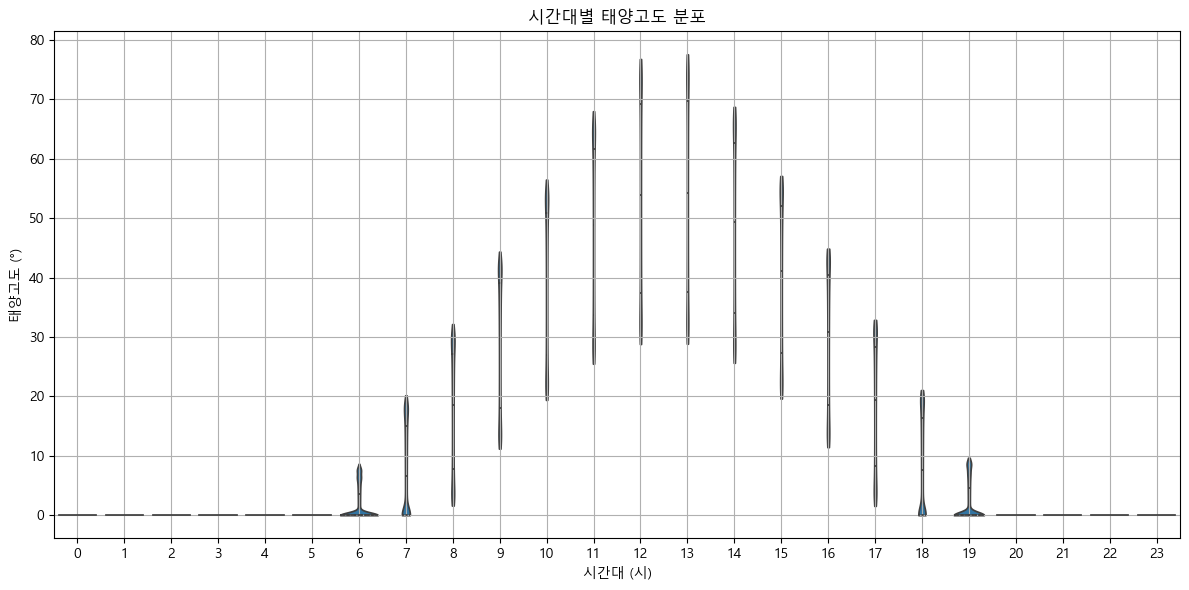

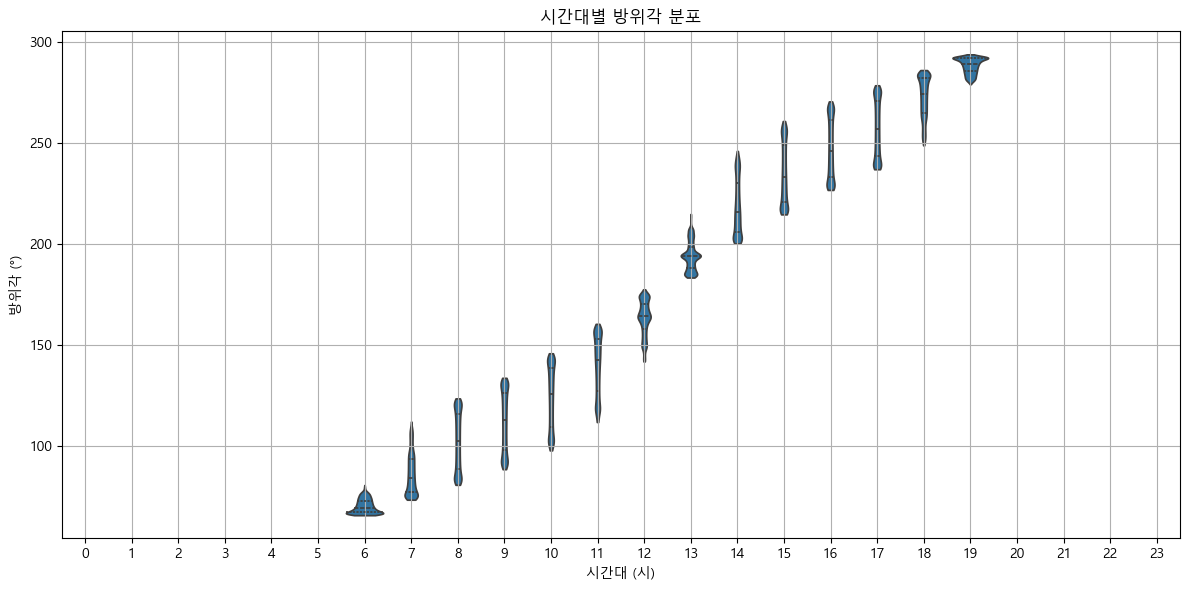

In [52]:
# ÏãúÍ∞ÑÎåÄ Ïª¨ÎüºÏùÑ ÏÉùÏÑ± (Í∏∞Ï°¥ 'ÏãúÍ∞Ñ'ÏùÑ Í∑∏ÎåÄÎ°ú Î≥µÏÇ¨Ìï¥ÏÑú ÏÇ¨Ïö©)
df_merged['ÏãúÍ∞ÑÎåÄ'] = df_merged['ÏãúÍ∞Ñ'] % 24  # ÌòπÏãú 24Í∞Ä ÏÑûÏó¨ ÏûàÏúºÎ©¥ 0ÏãúÎ°ú Î∞îÍøîÏ§å

# 1. ÌÉúÏñëÍ≥†ÎèÑ Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12, 6))
sns.violinplot(data=df_merged, x='ÏãúÍ∞ÑÎåÄ', y='ÌÉúÏñëÍ≥†ÎèÑ', inner='quartile', cut=0)
plt.title('ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌÉúÏñëÍ≥†ÎèÑ Î∂ÑÌè¨')
plt.xlabel('ÏãúÍ∞ÑÎåÄ (Ïãú)')
plt.ylabel('ÌÉúÏñëÍ≥†ÎèÑ (¬∞)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Î∞©ÏúÑÍ∞Å Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_merged, x='ÏãúÍ∞ÑÎåÄ', y='Î∞©ÏúÑÍ∞Å', inner='quartile', cut=0)
plt.title('ÏãúÍ∞ÑÎåÄÎ≥Ñ Î∞©ÏúÑÍ∞Å Î∂ÑÌè¨')
plt.xlabel('ÏãúÍ∞ÑÎåÄ (Ïãú)')
plt.ylabel('Î∞©ÏúÑÍ∞Å (¬∞)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. ÏûÑÏãú Ïª¨Îüº ÏÇ≠Ï†ú
df_merged.drop(columns=['ÏãúÍ∞ÑÎåÄ'], inplace=True)


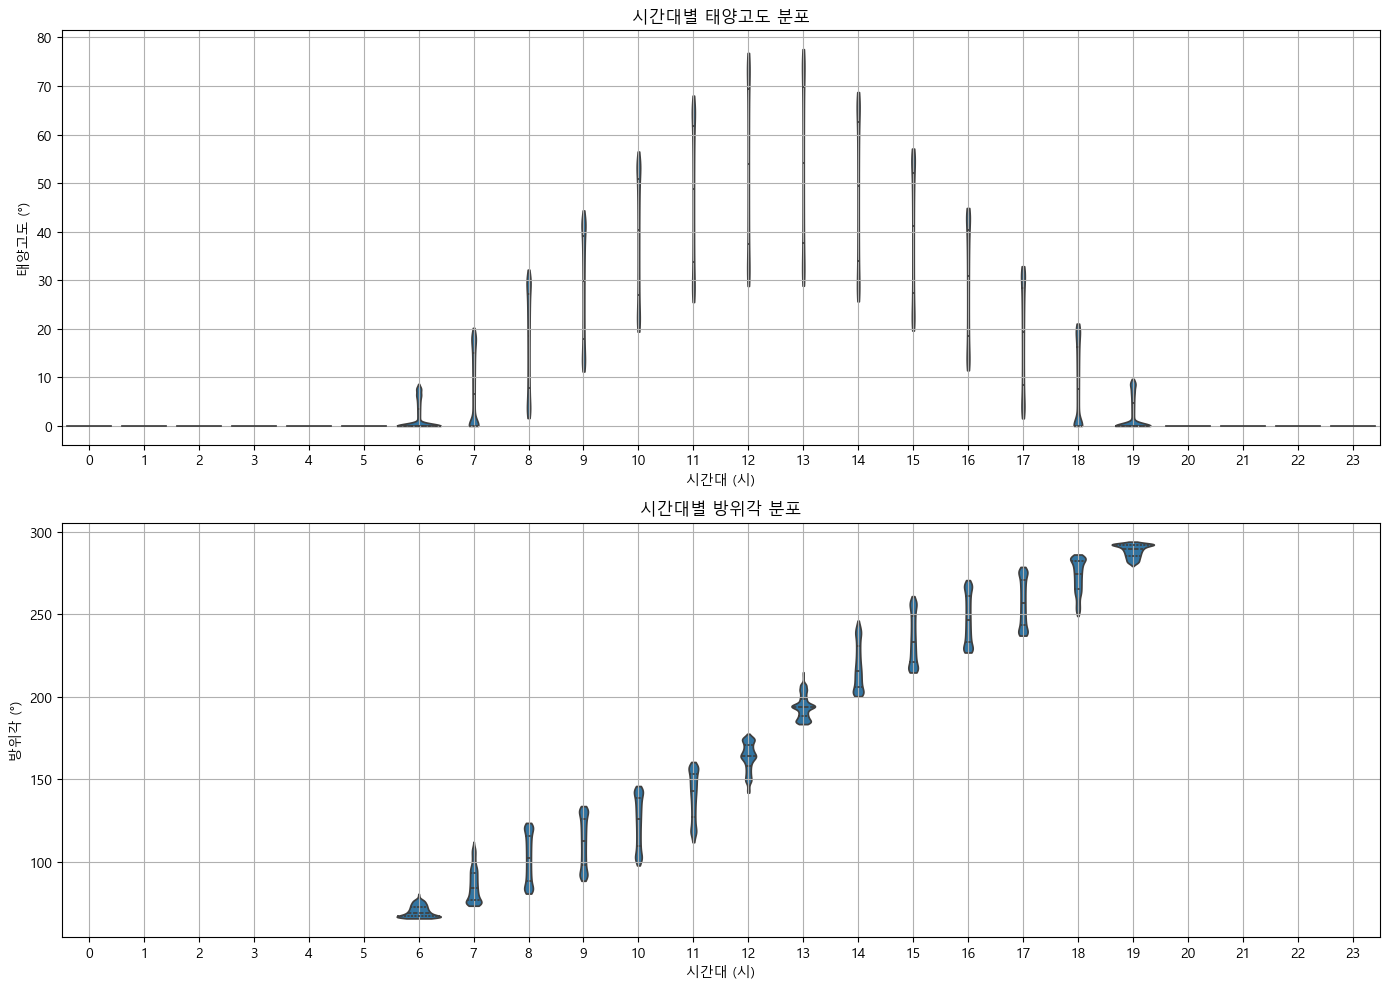

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 1. ÏãúÍ∞ÑÎåÄ Ïª¨Îüº ÏÉùÏÑ± (ÏãúÍ∞ÑÏùÑ 0~23ÏãúÎ°ú Ï†ïÍ∑úÌôî)
df_merged['ÏãúÍ∞ÑÎåÄ'] = df_merged['ÏãúÍ∞Ñ'] % 24

# 2. Í∑∏ÎûòÌîÑ ÏÉùÏÑ± Î∞è Ï†ÄÏû•
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 10))

# (1) ÌÉúÏñëÍ≥†ÎèÑ Î∂ÑÌè¨
sns.violinplot(data=df_merged, x='ÏãúÍ∞ÑÎåÄ', y='ÌÉúÏñëÍ≥†ÎèÑ', inner='quartile', cut=0, ax=axes[0])
axes[0].set_title('ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌÉúÏñëÍ≥†ÎèÑ Î∂ÑÌè¨')
axes[0].set_xlabel('ÏãúÍ∞ÑÎåÄ (Ïãú)')
axes[0].set_ylabel('ÌÉúÏñëÍ≥†ÎèÑ (¬∞)')
axes[0].grid(True)

# (2) Î∞©ÏúÑÍ∞Å Î∂ÑÌè¨
sns.violinplot(data=df_merged, x='ÏãúÍ∞ÑÎåÄ', y='Î∞©ÏúÑÍ∞Å', inner='quartile', cut=0, ax=axes[1])
axes[1].set_title('ÏãúÍ∞ÑÎåÄÎ≥Ñ Î∞©ÏúÑÍ∞Å Î∂ÑÌè¨')
axes[1].set_xlabel('ÏãúÍ∞ÑÎåÄ (Ïãú)')
axes[1].set_ylabel('Î∞©ÏúÑÍ∞Å (¬∞)')
axes[1].grid(True)

plt.tight_layout()
plt.savefig('ÌÉúÏñëÍ≥†ÎèÑ_Î∞©ÏúÑÍ∞Å_Î∂ÑÌè¨.png', dpi=300)  # üîΩ Ïó¨Í∏∞ÏÑú Ï†ÄÏû•Îê®
plt.show()

# 3. ÏûÑÏãú Ïª¨Îüº ÏÇ≠Ï†ú
df_merged.drop(columns=['ÏãúÍ∞ÑÎåÄ'], inplace=True)


In [56]:
df_merged = df_merged.sort_values(by=['ÏùºÏûê', 'ÏãúÍ∞Ñ']).reset_index(drop=True)


In [57]:
df_merged

ÏùºÏûê           Î∞úÏ†ÑÍµ¨Î∂Ñ  ÏÑ§ÎπÑÏö©Îüâ(MW)  ÏãúÍ∞Ñ  Î∞úÏ†ÑÎüâ(kWh)  Ïó∞Ïãù(ÎÖÑ)  ÏßÄÏ†êÎ™Ö  Í∏∞Ïò®(¬∞C)  \
0      2017-01-01   ÏÑ∏Ï¢ÖÏãúÌèêÍ∏∞Î¨ºÎß§Î¶ΩÏû•ÌÉúÏñëÍ¥ë     1.628   1       0.0    4.6   Ï≤≠Ï£º     2.2   
1      2017-01-01     ÏïàÏÇ∞Ïó∞ÏÑ±Ï†ïÏàòÏû•ÌÉúÏñëÍ¥ë     1.490   1       0.0    4.4   ÏàòÏõê     0.1   
2      2017-01-01      ÏòÅÏïîÏóêÌîÑÏõêÌÉúÏñëÍ¥ëb    13.296   1       0.0    4.1   Î™©Ìè¨     5.0   
3      2017-01-01   ÏÑ∏Ï¢ÖÏãúÌèêÍ∏∞Î¨ºÎß§Î¶ΩÏû•ÌÉúÏñëÍ¥ë     1.628   2       0.0    4.6   Ï≤≠Ï£º     1.9   
4      2017-01-01     ÏïàÏÇ∞Ïó∞ÏÑ±Ï†ïÏàòÏû•ÌÉúÏñëÍ¥ë     1.490   2       0.0    4.4   ÏàòÏõê    -1.1   
...           ...            ...       ...  ..       ...    ...  ...     ...   
196885 2023-12-31     (Íµ∞ÏÇ∞)ÏÇºÎûëÏßÑÌÉúÏñëÍ¥ë     2.000  23       0.0   15.7  ÏñëÏÇ∞Ïãú     2.3   
196886 2023-12-31  ÌÉúÏïà#9,10 ÏàòÏÉÅÌÉúÏñëÍ¥ë     1.836  23       0.0    7.7   ÏÑúÏÇ∞     2.8   
196887 2023-12-31     (Íµ∞ÏÇ∞)ÏÇºÎûëÏßÑÌÉúÏñëÍ¥ë     2.000  24       0.0   15.7  ÏñëÏÇ∞Ïãú     2.4   
196888 2023-12-31     (Íµ∞ÏÇ∞)ÏÇºÎûëÏßÑÌÉúÏñëÍ¥ë     2.000  24       0.0   15.7  ÏñëÏÇ∞Ïãú     2.4   
196889 2023-12-31  ÌÉúÏïà#9,10 ÏàòÏÉÅÌÉúÏñëÍ¥ë     1.836  24       0.0    7.7   ÏÑúÏÇ∞     2.6   

        Í∞ïÏàòÎüâ(mm)  ÌíçÏÜç(m/s)  ÌíçÌñ•(16Î∞©ÏúÑ)  ÏäµÎèÑ(%)  ÏùºÏÇ¨(MJ/m2)  Ï†ÅÏÑ§(cm)  ÌïòÎäòÏÉÅÌÉú  ÌÉúÏñëÍ≥†ÎèÑ  Î∞©ÏúÑÍ∞Å  
0           0.0      0.2       0.0   78.0        0.0     0.0   NaN   0.0  NaN  
1           0.0      0.3       0.0   96.0        0.0     0.0   NaN   0.0  NaN  
2           0.0      1.8     160.0   93.0        0.0     0.0   NaN   0.0  NaN  
3           0.0      0.5     340.0   80.0        0.0     0.0   NaN   0.0  NaN  
4           0.0      0.0       0.0   97.0        0.0     0.0   NaN   0.0  NaN  
...         ...      ...       ...    ...        ...     ...   ...   ...  ...  
196885      0.0      0.6     160.0   85.0        0.0     0.0   1.0   0.0  NaN  
196886      0.0      0.3       0.0   91.0        0.0     0.0   4.0   0.0  NaN  
196887      0.0      1.0     110.0   87.0        0.0     0.0   1.0   0.0  NaN  
196888      0.0      1.0     110.0   87.0        0.0     0.0   1.0   0.0  NaN  
196889      0.0      0.3       0.0   92.0        0.0     0.0   3.0   0.0  NaN  

[196890 rows x 17 columns]

In [58]:
df_merged.to_csv('df_merged_solar_final.csv', index=False, encoding='utf-8-sig')
